In [3]:
from src.preprocessing_modules import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from sklearn.decomposition import PCA
import umap
import pymde
import torch

In [4]:
# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

# First Data: GSE100866

## Gene Only

In [5]:
data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data, test_data, 64, 'GSE100866', 'gene_only')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 5000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = encoder.predict(test_data[:N_predict])

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


In [7]:
pca = PCA(n_components=10, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])

reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)
train_unencoded_umap = reducer.fit_transform(test_data[:N_predict])

### Visualization: tSNE-Gene Only vs Control, UMAP-Gene Only vs Control

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.715
Clustering Score of "second-arg data": 0.6848


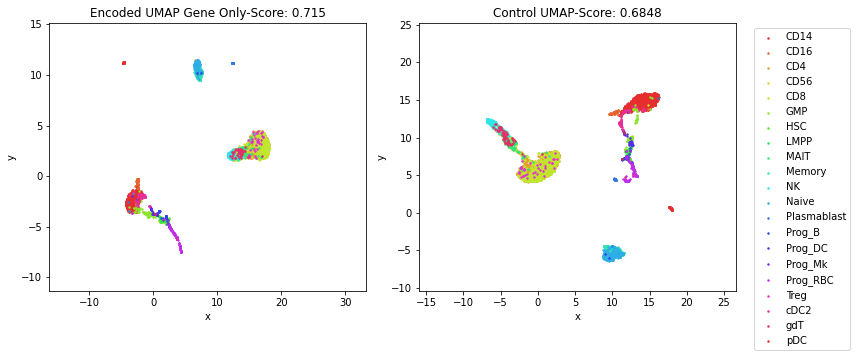

In [9]:
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)


left, right = comparison_cluster(train_encoded_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict,
           left_label = f'Encoded UMAP Gene Only-Score: {left}', right_label = f'Control UMAP-Score: {right}', spacer = 'GSE100866/geneOnly_UMAP')

## Gene Only with no MetaData

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Meta_data not found in the path, supplying a template metadata
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


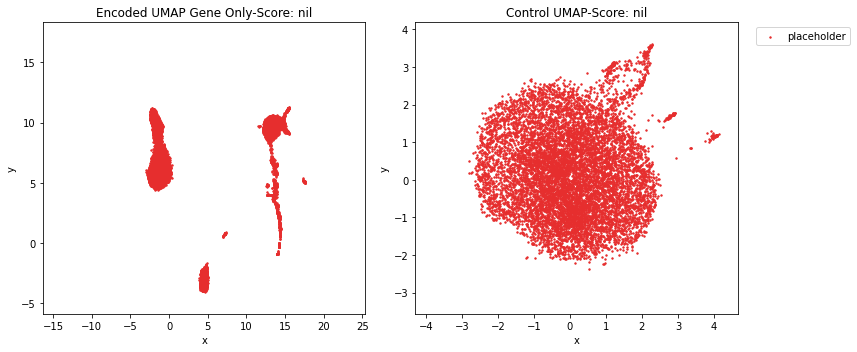

In [4]:
data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col, use_template_metadata = True)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data, test_data, 64, 'GSE100866', 'gene_only')
# Perform the UMAP on the bottleneck layer of the encoded data and the non encoded data
N_predict = 10000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = encoder.predict(test_data[:N_predict])
reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data[:N_predict])

color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)

# Comment out comparison_cluster because we don't have classes to compare it to
#left, right = comparison_cluster(train_encoded_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict,
           left_label = f'Encoded UMAP Gene Only-Score: {"nil"}', right_label = f'Control UMAP-Score: {"nil"}', spacer = 'GSE100866/geneOnly_NoMeta_UMAP')

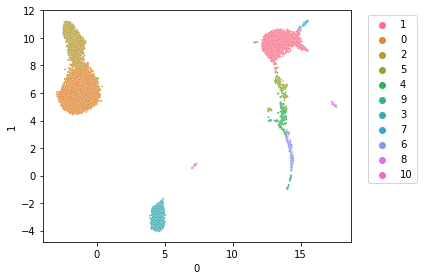

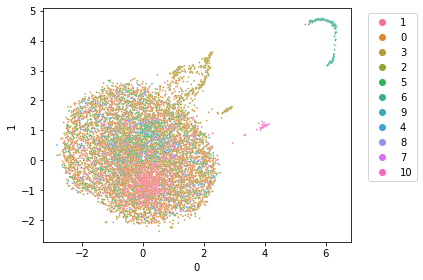

In [5]:
# Unsupervised Labelling of clusters
cluster_label_encoded = find_clusters(training_predicted)
plot_custom_labels(train_encoded_umap, cluster_label_encoded,'GSE100866')
cluster_label_encoded = find_clusters(test_data[:N_predict])
plot_custom_labels(train_unencoded_umap, cluster_label_encoded,'GSE100866','unencoded')

## Gene and Protein

In [8]:
data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data


In [9]:
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE100866', 'gene_pro')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 5000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])

MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


In [11]:
reducer = umap.UMAP()
train_encoded_gp_UMAP = reducer.fit_transform(training_predicted)

# Gene + Protein Data: train_encoded_gp_UMAP
# Gene Only Data: train_encoded_umap
# PCA into UMAP: train_unencoded_PCA_umap
# Only UMAP: train_unencoded_umap

### Visualization: tSNE-Gene + Protein vs Gene Only, UMAP-Gene + Protein vs Gene Only

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.907
Clustering Score of "second-arg data": 0.7328


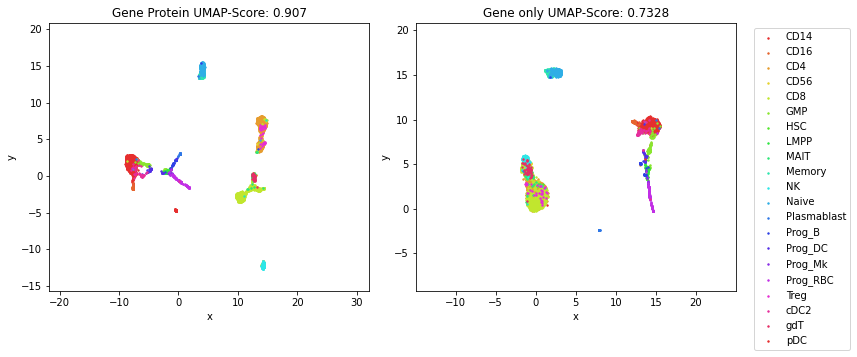

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Clustering Score of "first-arg data": 0.702
Clustering Score of "second-arg data": 0.3412


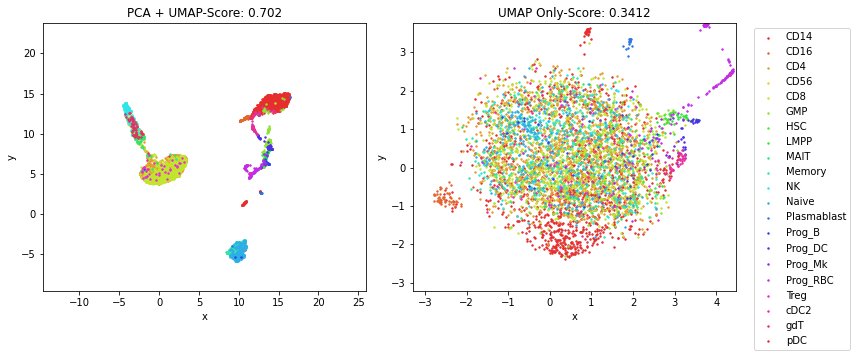

In [12]:
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
left, right = comparison_cluster(train_encoded_gp_UMAP, train_encoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_gp_UMAP, train_encoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score: {left}', right_label=f'Gene only UMAP-Score: {right}', spacer = 'GSE100866/gene_pro_UMAP')


left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score: {left}', right_label=f'UMAP Only-Score: {right}', spacer = 'GSE100866/Controls_UMAP')

### Usage of Custom Encoders and Custome Decoders for N-Omics data, in this case 2.

In [3]:
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()
data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)

train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)

_, __, merged_m = build_custom_autoencoders([gene_train_data.shape,pro_train_data.shape], 'GSE100866', [gene_train_data,pro_train_data],epochs = 15, override=  True,
                          n_hidden_layers = (2,1), division_rate = 4, actvn = 'sigmoid', embedding_dim = 64)
N_predict = 5000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted_2 = merged_m.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 components so we can visualise it.
train_encoded_gp_2 = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Epoch 1/15
384/384 [==============================] - 7s 14ms/step - loss: 1.7643 - dense_6_loss: 0.7611 - dense_8_loss: 1.0032
Epoch 2/15
384/384 [==============================] - 5s 14ms/step - loss: 1.4657 - dense_6_loss: 0.6871 - dense_8_loss: 0.7786
Epoch 3/15
384/384 [==============================] - 5s 14ms/step - loss: 1.3696 - dense_6_loss: 0.6819 - dense_8_loss: 0.6876
Epoch 4/15
384/384 [==============================] - 5s 14ms/step - loss: 1.3276 - dense_6_loss: 0.6779 - dense_8_loss: 0.6497
Epoch 5/15
384/384 [==============================] - 5s 14ms/step - loss: 1.3046 - dense_6_loss: 0.6742 - dense_8_loss: 0.6304
Epoch 6/15
384/384 [==============================] - 6s 14ms/step - loss: 1.2890 - dense_6_loss: 0.6714 - dense_8_loss: 0.6176
Epoch 7/15
384/384 [==============================] - 5s 1

# Second Data: GSE128639

In [14]:
data_directory = 'Sample Datasets/GSE128639'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE128639', 'gene_pro')

train_data_go, test_data_go, train_labels_go, test_labels_go = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data_go, test_data_go, 64, 'GSE128639', 'gene_only')

# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 10000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
training_predicted_go = encoder.predict(gene_test_data[:N_predict])
# Perform TSNE on 2 coponents so we can visualise it.
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
#left, right = comparison_cluster(train_encoded, train_unencoded,test_labels, N_predict = N_predict)
#vis_data2d(train_encoded, train_unencoded, test_labels, labels_encoder, color_map, N_predict, 
#           left_label=f'Gene Protein TSNE-Score:{left}', right_label=f'Control TSNE-Score:{right}', spacer = 'GSE128639/gene_pro_TSNE')

Reading Data in Sample Datasets/GSE128639/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Epoch 1/15
384/384 [==============================] - 10s 23ms/step - loss: 1.7653 - gene_decoder_last_loss: 0.7624 - protein_decoder_last_loss: 1.0029 - val_loss: 1.6022 - val_gene_decoder_last_loss: 0.7224 - val_protein_decoder_last_loss: 0.8798
Epoch 2/15
384/384 [==============================] - 8s 22ms/step - loss: 1.4657 - gene_decoder_last_loss: 0.6882 - protein_decoder_last_loss: 0.7774 - val_loss: 1.3922 - val_gene_decoder_last_loss: 0.6780 - val_protein_decoder_last_loss: 0.7142
Epoch 3/15
384/384 [==============================] - 8s 21ms/step - loss: 1.3753 - gene_decoder_last_loss: 0.6833 - protein_decoder_last_loss: 0.6920 - val_loss: 1.3395 - val_gene_decoder_last_loss: 0.6752 - val_protein_decoder_last_loss: 0.6643
Epoch 4/15
384/384 [==============================] - 9s 23ms/step - loss: 1.3341 - 

INFO:tensorflow:Assets written to: saved_models/GSE128639/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


Epoch 1/15
384/384 [==============================] - 8s 18ms/step - loss: 0.7653 - val_loss: 0.7001
Epoch 2/15
384/384 [==============================] - 5s 13ms/step - loss: 0.6900 - val_loss: 0.6779
Epoch 3/15
384/384 [==============================] - 6s 15ms/step - loss: 0.6822 - val_loss: 0.6727
Epoch 4/15
384/384 [==============================] - 5s 14ms/step - loss: 0.6768 - val_loss: 0.6692
Epoch 5/15
384/384 [==============================] - 6s 15ms/step - loss: 0.6721 - val_loss: 0.6662
Epoch 6/15
384/384 [==============================] - 5s 13ms/step - loss: 0.6680 - val_loss: 0.6644
Epoch 7/15
384/384 [==============================] - 6s 14ms/step - loss: 0.6641 - val_loss: 0.6619
Epoch 8/15
384/384 [==============================] - 5s 14ms/step - loss: 0.6606 - val_loss: 0.6614
Epoch 9/15
384/384 [==============================] - 5s 14ms/step - loss: 0.6582 - val_loss: 0.6598
Epoch 10/15
384/384 [==============================] - 5s 14ms/step - loss: 0.6552 - val_lo

INFO:tensorflow:Assets written to: saved_models/GSE128639/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


INFO:tensorflow:Assets written to: saved_models/GSE128639/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


### Visualization: UMAP-Gene Protein vs Control Data

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.9116
Clustering Score of "second-arg data": 0.745


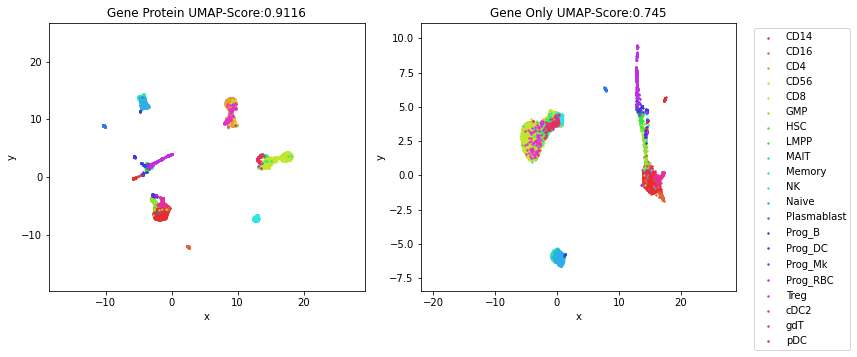

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.7132
Clustering Score of "second-arg data": 0.4507


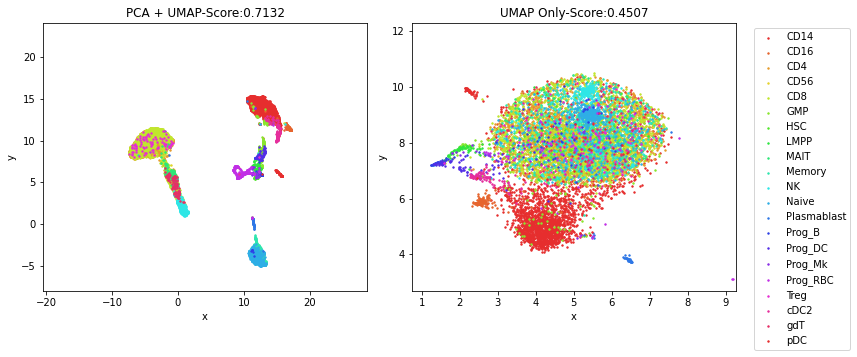

In [15]:
# PCA Things #

pca = PCA(n_components=10, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])

# UMAP #
reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data[:N_predict])
train_encoded_umap_go = reducer.fit_transform(training_predicted_go)
train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)


left, right = comparison_cluster(train_encoded_umap, train_encoded_umap_go,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_encoded_umap_go, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Gene Only UMAP-Score:{right}', spacer = 'GSE128639/gene_pro_UMAP')

left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score:{left}', right_label=f'UMAP Only-Score:{right}', spacer = 'GSE128639/Controls_UMAP')

# Third Data: GSE164378

In [94]:
'''new_meta_data = meta_data.sample(frac = 0.6, replace = False, random_state = 1)
indices = new_meta_data.index
print(len(indices))
rna.loc[indices].to_csv('Sample Datasets/GSE164378/new_rna.csv.gz', compression = 'gzip')
pro.loc[indices].to_csv('Sample Datasets/GSE164378/new_protein.csv.gz', compression = 'gzip')
new_meta_data.to_csv('Sample Datasets/GSE164378/new_meta_data.csv.gz', compression = 'gzip')'''

29117


In [95]:
data_directory = 'Sample Datasets/GSE164378'
cell_type_col = 'celltype.l1'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col, transpose = False)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE164378', 'gene_pro', override = True)
train_data_go, test_data_go, train_labels_go, test_labels_go = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data_go, test_data_go, 64, 'GSE164378', 'gene_only', override = True)


Reading Data in Sample Datasets/GSE164378/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Epoch 1/15
364/364 [==============================] - 16s 39ms/step - loss: 1.5517 - gene_decoder_last_loss: 0.6207 - protein_decoder_last_loss: 0.9310 - val_loss: 1.4681 - val_gene_decoder_last_loss: 0.6041 - val_protein_decoder_last_loss: 0.8641
Epoch 2/15
364/364 [==============================] - 12s 32ms/step - loss: 1.3359 - gene_decoder_last_loss: 0.5404 - protein_decoder_last_loss: 0.7954 - val_loss: 1.3220 - val_gene_decoder_last_loss: 0.5397 - val_protein_decoder_last_loss: 0.7823
Epoch 3/15
364/364 [==============================] - 15s 40ms/step - loss: 1.3073 - gene_decoder_last_loss: 0.5336 - protein_decoder_last_loss: 0.7737 - val_loss: 1.3065 - val_gene_decoder_last_loss: 0.5403 - val_protein_decoder_last_loss: 0.7662
Epoch 4/15
364/364 [==============================] - 12s 32ms/step - loss: 1.2911

INFO:tensorflow:Assets written to: saved_models/GSE164378/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE164378/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE164378/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


INFO:tensorflow:Assets written to: saved_models/GSE164378/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


Epoch 1/15
364/364 [==============================] - 10s 26ms/step - loss: 0.6200 - val_loss: 0.5722
Epoch 2/15
364/364 [==============================] - 9s 24ms/step - loss: 0.5410 - val_loss: 0.5368
Epoch 3/15
364/364 [==============================] - 8s 22ms/step - loss: 0.5305 - val_loss: 0.5341
Epoch 4/15
364/364 [==============================] - 9s 25ms/step - loss: 0.5258 - val_loss: 0.5301
Epoch 5/15
364/364 [==============================] - 9s 23ms/step - loss: 0.5220 - val_loss: 0.5272
Epoch 6/15
364/364 [==============================] - 10s 29ms/step - loss: 0.5188 - val_loss: 0.5250
Epoch 7/15
364/364 [==============================] - 10s 27ms/step - loss: 0.5162 - val_loss: 0.5238
Epoch 8/15
364/364 [==============================] - 10s 28ms/step - loss: 0.5136 - val_loss: 0.5225
Epoch 9/15
364/364 [==============================] - 9s 26ms/step - loss: 0.5116 - val_loss: 0.5213
Epoch 10/15
364/364 [==============================] - 10s 28ms/step - loss: 0.5099 - v

INFO:tensorflow:Assets written to: saved_models/GSE164378/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/GSE164378/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


INFO:tensorflow:Assets written to: saved_models/GSE164378/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


Clustering Score of "first-arg data": 0.9470666666666666
Clustering Score of "second-arg data": 0.886


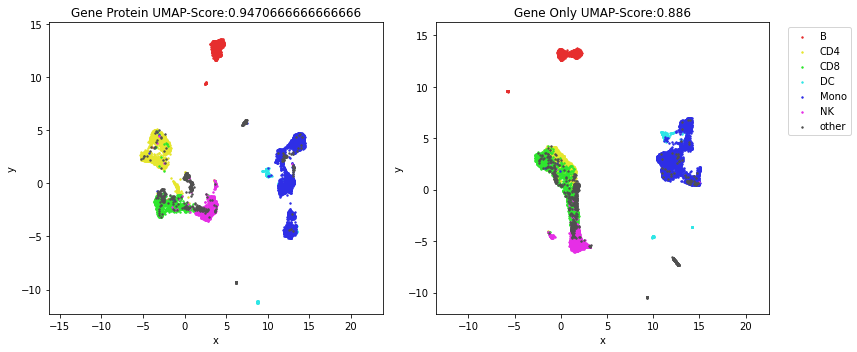

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Clustering Score of "first-arg data": 0.8221333333333334
Clustering Score of "second-arg data": 0.8144


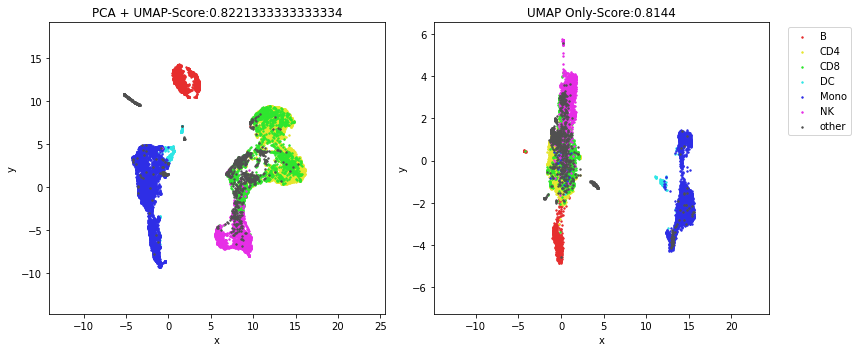

In [103]:
N_predict = 15000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 coponents so we can visualise it.
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)

color_map['other'] = '#505050'

# PCA Things #

pca = PCA(n_components=5, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])


reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data_go[:N_predict])

training_predicted_go = encoder.predict([test_data_go[:N_predict]])
train_encoded_go_umap = reducer.fit_transform(training_predicted_go)

train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)

left, right = comparison_cluster(train_encoded_umap, train_encoded_go_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_encoded_go_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Gene Only UMAP-Score:{right}', spacer = 'GSE164378/gene_GP_CELLTYPE_UMAP')

left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score:{left}', right_label=f'UMAP Only-Score:{right}', spacer = 'GSE164378/Controls_CELLTYPE_UMAP')



# Fourth Data: GSE153056

In [27]:
data_directory = 'Sample Datasets/GSE153056'
cell_type_col = 'Phase'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE153056', 'gene_pro')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data

train_data_go, test_data_go, train_labels_go, test_labels_go = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data_go, test_data_go, 64, 'GSE153056', 'gene_only')

Reading Data in Sample Datasets/GSE153056/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


Clustering Score of "first-arg data": 0.929570670525808
Clustering Score of "second-arg data": 0.9401029104357613


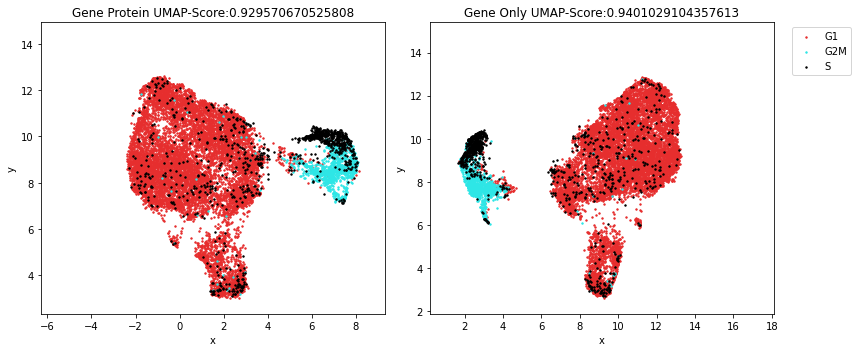

Clustering Score of "first-arg data": 0.9247467438494935
Clustering Score of "second-arg data": 0.9142949027174787


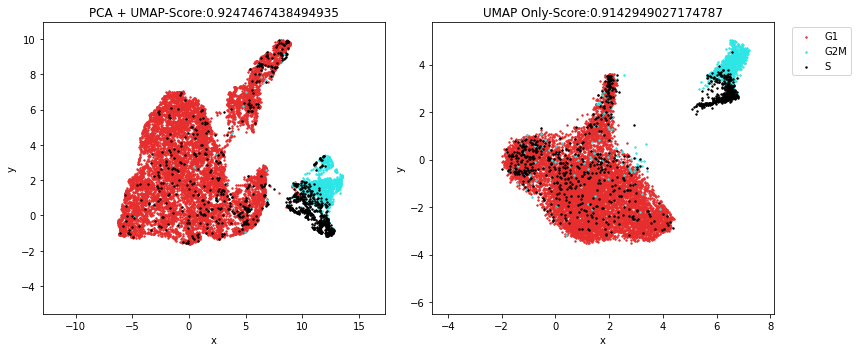

In [34]:
N_predict = 12438
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 coponents so we can visualise it.
#color = generate_color(labels_encoder, labels)
color = ['#e62e2e', '#2ee6e6', '#000000']
color_map = generate_colormap(color, labels_encoder, labels)

# PCA Things #

pca = PCA(n_components=5, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])


reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data_go[:N_predict])

training_predicted_go = encoder.predict([test_data_go[:N_predict]])
train_encoded_go_umap = reducer.fit_transform(training_predicted_go)

train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)

left, right = comparison_cluster(train_encoded_umap, train_encoded_go_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_encoded_go_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Gene Only UMAP-Score:{right}', spacer = 'GSE153056/gene_GP_UMAP')

left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score:{left}', right_label=f'UMAP Only-Score:{right}', spacer = 'GSE153056/Controls_UMAP')

# Fifth Data: GSE166489

## MIS-C Severe

In [62]:
data_directory = 'Sample Datasets/GSE166489/MIS-C Severe/GSM5073055'
cell_type_col = 'predicted.celltype.l1'
meta_data0, pro0, rna0, cite_seq_data0 = read_data(data_directory, cell_type_col)
data_directory = 'Sample Datasets/GSE166489/MIS-C Severe/GSM5073056'
meta_data1, pro1, rna1, cite_seq_data1 = read_data(data_directory, cell_type_col)
meta_data = pd.concat([meta_data0, meta_data1])
rna = pd.concat([rna0, rna1])
rna.dropna(axis = 1, inplace = True)
pro = pd.concat([pro0, pro1])
pro.dropna(axis = 1, inplace = True)
cite_seq_data = pd.concat([rna, pro], axis = 1)
meta_data['celltype'] = meta_data[cell_type_col].str.split().str[0]
labels_encoder = preprocessing.LabelEncoder()
labels_encoder.fit(meta_data['celltype'])
labels = labels_encoder.transform(meta_data['celltype'])
data_with_targets = cite_seq_data.copy()
data_with_targets['cell_int'] = labels
data_with_targets

Reading Data in Sample Datasets/GSE166489/MIS-C Severe/GSM5073055/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Reading Data in Sample Datasets/GSE166489/MIS-C Severe/GSM5073056/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data


,AC233755.2,IGHV3-20,IGHA2,IGLC2,C1QB,C1QA,IGHG2,IGLC3,C1QC,IGHV6-1,...,1046-anti-human-CD88,1047-anti-human-HLAF,1048-anti-human-NLRP2,1049-anti-human-CD289,1051-anti-human-Podocalyxin,1052-anti-human-CD224,1056-anti-human-CD258,1057-anti-human-DR3,5148-anti-human-EGFR,cell_int
AAACCTGAGCCACCTG-1,-0.108998,-0.098858,-0.134750,-0.19200,-0.086513,-0.104455,-0.158767,-0.174038,-0.082343,-0.09030,...,-0.037617,1.179154,0.678565,-0.035651,1.351384,-0.516576,-0.023692,-0.212586,0.498091,6
AAACCTGAGTACACCT-1,-0.108998,-0.098858,-0.134750,-0.19200,-0.086513,-0.104455,-0.158767,-0.174038,-0.082343,-0.09030,...,0.960087,-2.066563,0.789725,-0.035651,-0.533441,0.806062,-0.741951,-1.519736,0.310540,4
AAACCTGCACATGACT-1,-0.108998,-0.098858,-0.134750,-0.19200,-0.086513,-0.104455,-0.158767,-0.174038,-0.082343,-0.09030,...,-1.264632,-0.118157,-0.047082,-0.035651,-0.334875,-2.830778,0.250589,-2.199452,-0.063605,5
AAACCTGCACCTCGTT-1,-0.108998,-0.098858,-0.134750,-0.19200,-0.086513,-0.104455,-0.158767,-0.174038,-0.082343,-0.09030,...,-2.001336,-2.250376,0.909649,-0.035651,0.980489,-0.420524,0.007307,0.829332,0.532841,2
AAACCTGCACTTACGA-1,-0.108998,-0.098858,-0.134750,-0.19200,-0.086513,-0.104455,-0.158767,-0.174038,-0.082343,-0.09030,...,0.757557,0.649491,0.098005,-0.035651,0.019137,-0.168670,0.260379,0.467317,0.135797,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCGCGAAA-1,-0.114603,-0.121345,-0.199639,-0.28254,-0.022810,-0.044413,-0.202622,-0.229249,-0.026326,-0.11792,...,-0.432184,-0.094309,-0.859644,-0.039752,-1.136063,-0.793378,-2.205732,-0.494457,-0.865205,2
TTTGTCAGTCGCTTCT-1,-0.114603,-0.121345,-0.199639,-0.28254,-0.022810,-0.044413,-0.202622,-0.229249,-0.026326,-0.11792,...,0.451559,-2.052135,0.381390,-0.039752,-0.746607,-0.228784,0.448232,0.429786,-0.064330,1
TTTGTCATCATAGCAC-1,-0.114603,-0.121345,-0.199639,-0.28254,-0.022810,-0.044413,-0.202622,-0.229249,-0.026326,-0.11792,...,-0.072469,0.688483,1.017705,-0.039752,1.152483,0.929802,0.672725,1.169182,0.947014,6
TTTGTCATCATTTGGG-1,-0.114603,-0.121345,-0.199639,-0.28254,-0.022810,-0.044413,-0.202622,-0.229249,-0.026326,-0.11792,...,-0.783928,1.144556,0.704392,-0.039752,1.051996,-1.007316,0.084258,-0.349632,-1.318356,2


In [63]:
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE166489', 'gene_pro_Severe', N_hidden_protein = 2)
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data

train_data_go, test_data_go, train_labels_go, test_labels_go = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data_go, test_data_go, 64, 'GSE166489', 'gene_only_Severe')

MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Clustering Score of "first-arg data": 0.8376153931709487
Clustering Score of "second-arg data": 0.6607718829941052


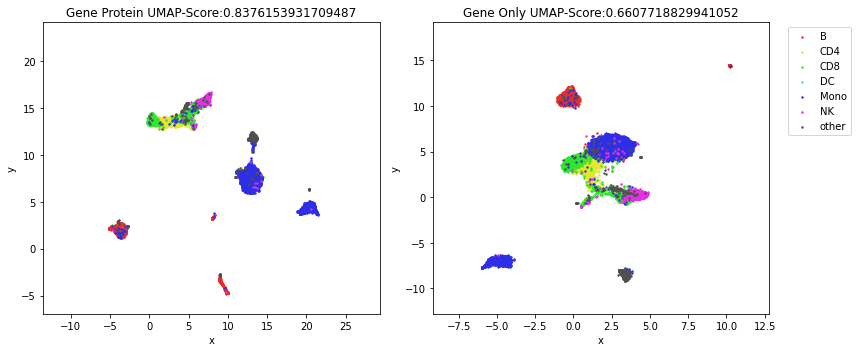

Clustering Score of "first-arg data": 0.7200533867200534
Clustering Score of "second-arg data": 0.48837726615504395


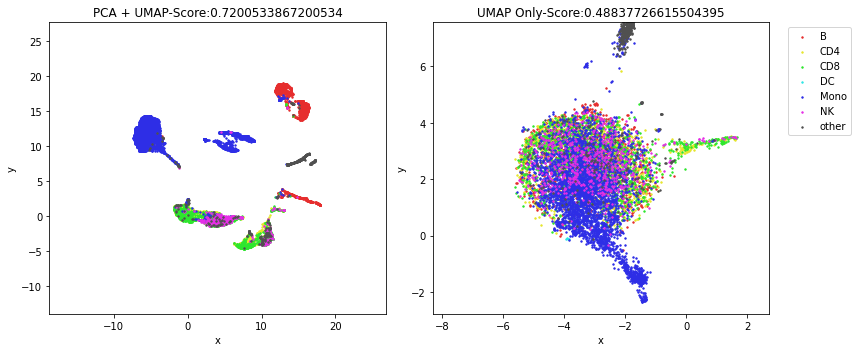

In [64]:
N_predict = 10000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 coponents so we can visualise it.
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
color_map['other'] = '#505050'

# PCA Things #

pca = PCA(n_components=5, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])

reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data_go[:N_predict])

training_predicted_go = encoder.predict([test_data_go[:N_predict]])
train_encoded_go_umap = reducer.fit_transform(training_predicted_go)

train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)

left, right = comparison_cluster(train_encoded_umap, train_encoded_go_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_encoded_go_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Gene Only UMAP-Score:{right}', spacer = 'GSE166489/gene_GP_Severe_UMAP')

left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score:{left}', right_label=f'UMAP Only-Score:{right}', spacer = 'GSE166489/Controls_Severe_UMAP')

## Normal

In [43]:
data_directory = 'Sample Datasets/GSE166489/Normal/GSM5073070'
cell_type_col = 'predicted.celltype.l1'
meta_data0, pro0, rna0, cite_seq_data0 = read_data(data_directory, cell_type_col)
data_directory = 'Sample Datasets/GSE166489/Normal/GSM5073071'
meta_data1, pro1, rna1, cite_seq_data1 = read_data(data_directory, cell_type_col)
data_directory = 'Sample Datasets/GSE166489/Normal/GSM5073072'
meta_data2, pro2, rna2, cite_seq_data2 = read_data(data_directory, cell_type_col)
meta_data = pd.concat([meta_data0, meta_data1,meta_data2])
rna = pd.concat([rna0, rna1, rna2])
rna.dropna(axis = 1, inplace = True)
pro = pd.concat([pro0, pro1, pro2])
pro.dropna(axis = 1, inplace = True)
cite_seq_data = pd.concat([rna, pro], axis = 1)
meta_data['celltype'] = meta_data[cell_type_col].str.split().str[0]
labels_encoder = preprocessing.LabelEncoder()
labels_encoder.fit(meta_data['celltype'])
labels = labels_encoder.transform(meta_data['celltype'])
data_with_targets = cite_seq_data.copy()
data_with_targets['cell_int'] = labels
data_with_targets


Reading Data in Sample Datasets/GSE166489/Normal/GSM5073070/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Reading Data in Sample Datasets/GSE166489/Normal/GSM5073071/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Reading Data in Sample Datasets/GSE166489/Normal/GSM5073072/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data


,IGKV1-5,HBB,S100A8,IGLV1-44,JCHAIN,S100A9,IGKV3-15,IGHV4-34,HBA2,IGHA1,...,1046-anti-human-CD88,1047-anti-human-HLAF,1048-anti-human-NLRP2,1049-anti-human-CD289,1051-anti-human-Podocalyxin,1052-anti-human-CD224,1056-anti-human-CD258,1057-anti-human-DR3,5148-anti-human-EGFR,cell_int
AAACCTGAGCTAGGCA-1,-0.060996,-0.085258,-0.413467,-0.064036,-0.132253,-0.435464,-0.052619,-0.063959,-0.052159,-0.094097,...,-1.672555,1.956201,0.386307,-0.041898,-0.380802,1.638698,-0.292939,-0.228609,0.471544,1
AAACCTGAGCTCCTTC-1,-0.060996,-0.085258,-0.413467,-0.064036,-0.132253,-0.435464,-0.052619,-0.063959,-0.052159,-0.094097,...,-2.130321,-1.009330,1.020948,-0.041898,1.127880,0.132534,-0.333726,0.863044,-0.121816,1
AAACCTGAGGGCATGT-1,-0.060996,-0.085258,-0.413467,-0.064036,-0.132253,0.924318,-0.052619,-0.063959,-0.052159,-0.094097,...,-0.189344,-0.045386,1.424330,-0.041898,0.804290,-0.673582,0.840467,1.105698,0.277700,2
AAACCTGAGGGTCGAT-1,-0.060996,-0.085258,-0.413467,-0.064036,-0.132253,-0.435464,-0.052619,-0.063959,-0.052159,-0.094097,...,0.828937,1.305690,1.566549,-0.041898,0.990594,0.131244,0.778985,0.861071,-0.203015,2
AAACCTGAGTACGACG-1,-0.060996,-0.085258,-0.413467,-0.064036,-0.132253,-0.435464,-0.052619,-0.063959,-0.052159,-0.094097,...,-0.024663,0.684755,0.432008,-0.041898,1.156684,-0.352778,0.087539,-0.523278,0.409727,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGTCTGCT-1,10.000000,0.194741,-0.465797,-0.082162,-0.187408,-0.484218,-0.087462,-0.088949,-0.348257,-0.103971,...,-0.580272,0.689422,-2.210109,-0.045288,-0.341498,-1.704287,-0.553895,-1.163221,-0.316609,0
TTTGTCATCTATGTGG-1,-0.081749,-0.508855,2.377093,-0.082162,-0.187408,2.463293,-0.087462,-0.088949,-0.348257,-0.103971,...,2.159326,0.078810,-0.216499,-0.045288,-0.567139,0.877436,0.107405,-0.965008,-1.251563,4
TTTGTCATCTCTAGGA-1,-0.081749,0.355850,1.850677,-0.082162,-0.187408,0.584861,-0.087462,-0.088949,-0.348257,-0.103971,...,1.847461,0.885037,0.829207,-0.045288,0.334676,0.416426,0.077482,0.311792,0.557128,4
TTTGTCATCTGGCGAC-1,-0.081749,0.052558,2.699972,-0.082162,-0.187408,2.697015,-0.087462,-0.088949,-0.348257,-0.103971,...,1.823403,-0.335872,-0.022779,-0.045288,-0.292687,1.249560,0.506498,-2.428551,-1.468367,4


In [44]:
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'GSE166489', 'gene_pro_Normal', N_hidden_protein = 2)
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data

train_data_go, test_data_go, train_labels_go, test_labels_go = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data_go, test_data_go, 64, 'GSE166489', 'gene_only_Normal')

MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.8555
Clustering Score of "second-arg data": 0.8229444444444445


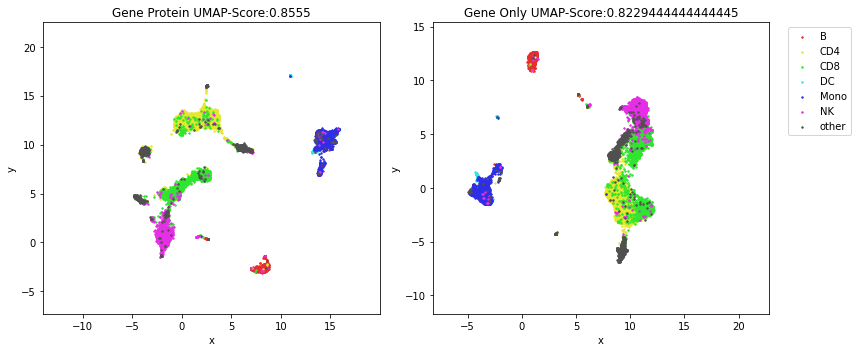

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.7471111111111111
Clustering Score of "second-arg data": 0.7120555555555556


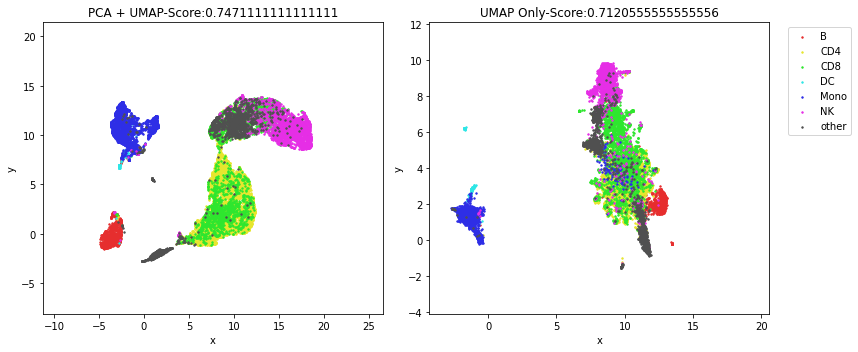

In [47]:
N_predict = 18000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]])
# Perform TSNE on 2 coponents so we can visualise it.
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)
color_map['other'] = '#505050'

# PCA Things #

pca = PCA(n_components=5, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])

reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data_go[:N_predict])

training_predicted_go = encoder.predict([test_data_go[:N_predict]])
train_encoded_go_umap = reducer.fit_transform(training_predicted_go)

train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)

left, right = comparison_cluster(train_encoded_umap, train_encoded_go_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_encoded_go_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Gene Only UMAP-Score:{right}', spacer = 'GSE166489/gene_GP_Normal_UMAP')

left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score:{left}', right_label=f'UMAP Only-Score:{right}', spacer = 'GSE166489/Controls_Normal_UMAP')

# Kotliarov et al., 2020

### Low responders

In [57]:
data_directory = 'Sample Datasets/Kotliarov_2020/low_responders'
cell_type_col = 'celltype'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col,False)
pro.set_index('X', inplace=True)
rna.set_index('X', inplace = True)
cite_seq_data.set_index('X', inplace = True)
data_with_targets.set_index('X', inplace = True)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'Kotliarov', 'gene_pro', override = True)
train_data_go, test_data_go, train_labels_go, test_labels_go = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data_go, test_data_go, 64, 'Kotliarov', 'gene_only', override = True)
N_predict = 10000 # number of subsampling
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]]) #predict bottleneck base on input
color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)

Reading Data in Sample Datasets/Kotliarov_2020/low_responders/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Epoch 1/15
309/309 [==============================] - 7s 19ms/step - loss: 1.2624 - gene_decoder_last_loss: 0.2616 - protein_decoder_last_loss: 1.0008 - val_loss: 1.1271 - val_gene_decoder_last_loss: 0.2201 - val_protein_decoder_last_loss: 0.9070
Epoch 2/15
309/309 [==============================] - 5s 15ms/step - loss: 0.9902 - gene_decoder_last_loss: 0.2049 - protein_decoder_last_loss: 0.7853 - val_loss: 0.9557 - val_gene_decoder_last_loss: 0.2027 - val_protein_decoder_last_loss: 0.7530
Epoch 3/15
309/309 [==============================] - 5s 15ms/step - loss: 0.9342 - gene_decoder_last_loss: 0.1970 - protein_decoder_last_loss: 0.7372 - val_loss: 0.9163 - val_gene_decoder_last_loss: 0.1957 - val_protein_decoder_last_loss: 0.7207
Epoch 4/15
309/309 [==============================] - 5s 16ms/ste

INFO:tensorflow:Assets written to: saved_models/Kotliarov/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


Epoch 1/15
309/309 [==============================] - 5s 14ms/step - loss: 0.2589 - val_loss: 0.2155
Epoch 2/15
309/309 [==============================] - 3s 10ms/step - loss: 0.1962 - val_loss: 0.1915
Epoch 3/15
309/309 [==============================] - 3s 10ms/step - loss: 0.1885 - val_loss: 0.1873
Epoch 4/15
309/309 [==============================] - 3s 10ms/step - loss: 0.1848 - val_loss: 0.1849
Epoch 5/15
309/309 [==============================] - 4s 13ms/step - loss: 0.1822 - val_loss: 0.1834
Epoch 6/15
309/309 [==============================] - 4s 12ms/step - loss: 0.1803 - val_loss: 0.1827
Epoch 7/15
309/309 [==============================] - 3s 11ms/step - loss: 0.1789 - val_loss: 0.1821
Epoch 8/15
309/309 [==============================] - 3s 11ms/step - loss: 0.1777 - val_loss: 0.1814
Epoch 9/15
309/309 [==============================] - 3s 11ms/step - loss: 0.1765 - val_loss: 0.1808
Epoch 10/15
309/309 [==============================] - 3s 10ms/step - loss: 0.1756 - val_lo

INFO:tensorflow:Assets written to: saved_models/Kotliarov/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.9029
Clustering Score of "second-arg data": 0.7678


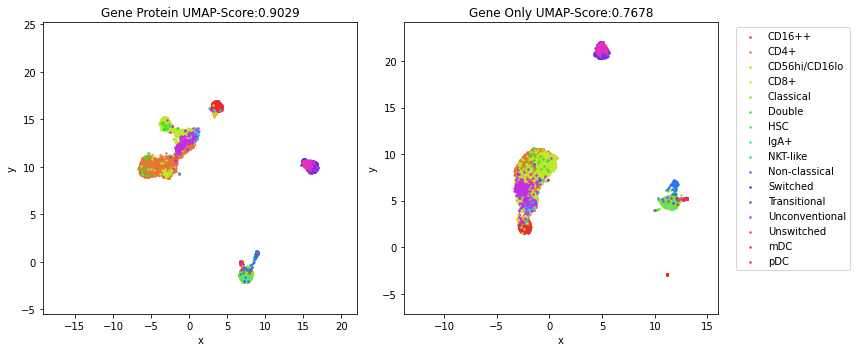

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.7515
Clustering Score of "second-arg data": 0.6569


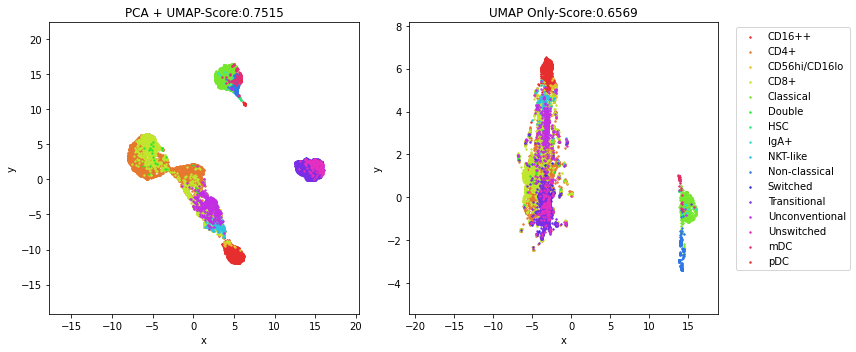

In [58]:
# PCA Things #

pca = PCA(n_components=5, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])

reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted) # This UMAPs the output from the gene+protein data
train_unencoded_umap = reducer.fit_transform(test_data_go[:N_predict]) # This UMAPS the gene data but no autoencoder

training_predicted_go = encoder.predict([test_data_go[:N_predict]]) # This UMAPS the output from gene data autoencoder
train_encoded_go_umap = reducer.fit_transform(training_predicted_go) # same as above.

train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)

left, right = comparison_cluster(train_encoded_umap, train_encoded_go_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_encoded_go_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Gene Only UMAP-Score:{right}', spacer = 'Kotliarov/gene_GP_CELLTYPE_UMAP')

left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score:{left}', right_label=f'UMAP Only-Score:{right}', spacer = 'Kotliarov/Controls_CELLTYPE_UMAP')

### High Responders

In [60]:
data_directory = 'Sample Datasets/Kotliarov_2020/high_responders'
cell_type_col = 'celltype'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col,False,)
pro.set_index('X', inplace=True)
rna.set_index('X', inplace = True)
cite_seq_data.set_index('X', inplace = True)
data_with_targets.set_index('X', inplace = True)

train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = False)
gene_train_data,pro_train_data,gene_test_data,pro_test_data = split_training_with_labels(train_data, test_data, pro)
history, autodecoder, merged = gene_protein_encoder(pro_train_data,gene_train_data,pro_test_data, gene_test_data, 64, 'Kotliarov/high_responders', 'gene_pro')

train_data_go, test_data_go, train_labels_go, test_labels_go = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data_go, test_data_go, 64, 'Kotliarov/high_responders', 'gene_only')

N_predict = 10000 # number of subsampling
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = merged.predict([gene_test_data[:N_predict],pro_test_data[:N_predict]]) #predict bottleneck base on input

color = generate_color(labels_encoder, labels)
color_map = generate_colormap(color, labels_encoder, labels)

Reading Data in Sample Datasets/Kotliarov_2020/high_responders/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
Epoch 1/15
356/356 [==============================] - 10s 24ms/step - loss: 1.2072 - gene_decoder_last_loss: 0.2480 - protein_decoder_last_loss: 0.9592 - val_loss: 1.0690 - val_gene_decoder_last_loss: 0.2124 - val_protein_decoder_last_loss: 0.8566
Epoch 2/15
356/356 [==============================] - 7s 19ms/step - loss: 0.9539 - gene_decoder_last_loss: 0.1958 - protein_decoder_last_loss: 0.7581 - val_loss: 0.9242 - val_gene_decoder_last_loss: 0.1920 - val_protein_decoder_last_loss: 0.7323
Epoch 3/15
356/356 [==============================] - 6s 18ms/step - loss: 0.9071 - gene_decoder_last_loss: 0.1890 - protein_decoder_last_loss: 0.7181 - val_loss: 0.8929 - val_gene_decoder_last_loss: 0.1875 - val_protein_decoder_last_loss: 0.7054
Epoch 4/15
356/356 [==============================] - 6s 18ms/s

INFO:tensorflow:Assets written to: saved_models/Kotliarov/high_responders/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/high_responders/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/high_responders/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/high_responders/gene_pro_NHG2_NHP1_DIV4_EPOCHS15_EncodingDim64_merged\assets


Epoch 1/15
356/356 [==============================] - 7s 17ms/step - loss: 0.2452 - val_loss: 0.2033
Epoch 2/15
356/356 [==============================] - 5s 14ms/step - loss: 0.1874 - val_loss: 0.1828
Epoch 3/15
356/356 [==============================] - 5s 14ms/step - loss: 0.1806 - val_loss: 0.1793
Epoch 4/15
356/356 [==============================] - 5s 14ms/step - loss: 0.1772 - val_loss: 0.1774
Epoch 5/15
356/356 [==============================] - 5s 14ms/step - loss: 0.1749 - val_loss: 0.1761
Epoch 6/15
356/356 [==============================] - 5s 13ms/step - loss: 0.1733 - val_loss: 0.1751
Epoch 7/15
356/356 [==============================] - 5s 13ms/step - loss: 0.1720 - val_loss: 0.1746
Epoch 8/15
356/356 [==============================] - 4s 12ms/step - loss: 0.1709 - val_loss: 0.1738
Epoch 9/15
356/356 [==============================] - 4s 13ms/step - loss: 0.1701 - val_loss: 0.1734
Epoch 10/15
356/356 [==============================] - 5s 14ms/step - loss: 0.1693 - val_lo

INFO:tensorflow:Assets written to: saved_models/Kotliarov/high_responders/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_auto\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/high_responders/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


INFO:tensorflow:Assets written to: saved_models/Kotliarov/high_responders/gene_only_NHL2_DIV4_EPOCHS15_EncodingDim64_encoder\assets


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.9131
Clustering Score of "second-arg data": 0.8393


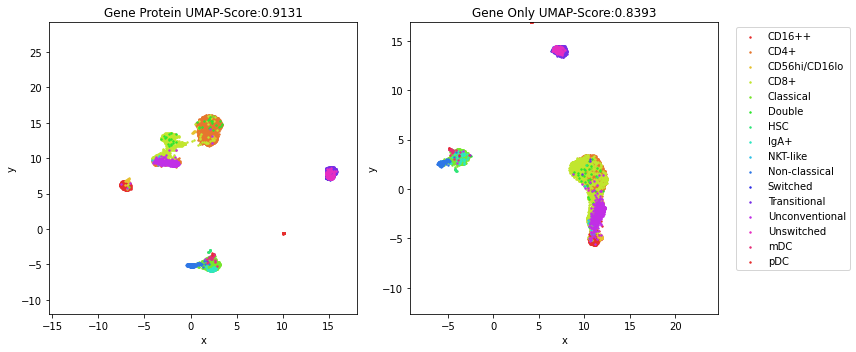

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Clustering Score of "first-arg data": 0.7242
Clustering Score of "second-arg data": 0.6568


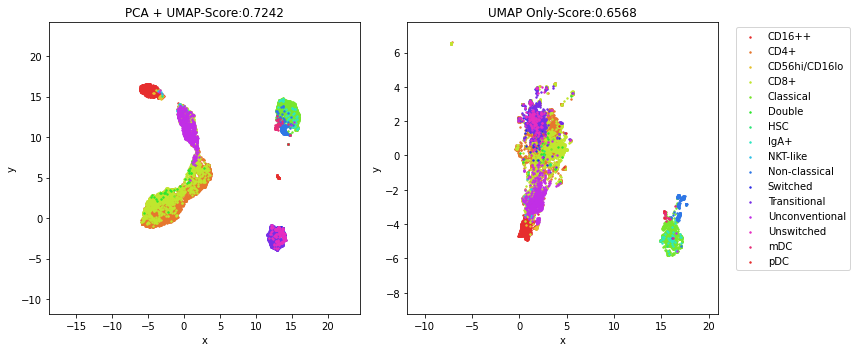

In [61]:
# PCA Things #

pca = PCA(n_components=5, svd_solver = 'auto')
Principal_components=pca.fit_transform(test_data[:N_predict])

reducer = umap.UMAP()
train_encoded_umap = reducer.fit_transform(training_predicted)
train_unencoded_umap = reducer.fit_transform(test_data_go[:N_predict])

training_predicted_go = encoder.predict([test_data_go[:N_predict]])
train_encoded_go_umap = reducer.fit_transform(training_predicted_go)

train_unencoded_PCA_umap = reducer.fit_transform(Principal_components)

left, right = comparison_cluster(train_encoded_umap, train_encoded_go_umap,test_labels, N_predict = N_predict)
vis_data2d(train_encoded_umap, train_encoded_go_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'Gene Protein UMAP-Score:{left}', right_label=f'Gene Only UMAP-Score:{right}', spacer = 'Kotliarov/high_responders/gene_GP_CELLTYPE_UMAP')

left, right = comparison_cluster(train_unencoded_PCA_umap, train_unencoded_umap,test_labels, N_predict = N_predict)
vis_data2d(train_unencoded_PCA_umap, train_unencoded_umap, test_labels, labels_encoder, color_map, N_predict, 
           left_label=f'PCA + UMAP-Score:{left}', right_label=f'UMAP Only-Score:{right}', spacer = 'Kotliarov/high_responders/Controls_CELLTYPE_UMAP')